In [1]:
import numpy as np
import pydensecrf.densecrf as dcrf
from skimage.io import imread, imsave
from pydensecrf.utils import unary_from_labels, create_pairwise_bilateral
from skimage.color import gray2rgb
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm_notebook
%matplotlib inline

In [2]:
def rle_decode(rle_mask):
    '''
    rle_mask: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = rle_mask.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(101*101, dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(101,101)

In [3]:
def rle_encode1(im):
    '''
    im: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels = im.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

In [4]:
def rle_encode2(im):
    pixels = im.flatten(order = 'F')
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

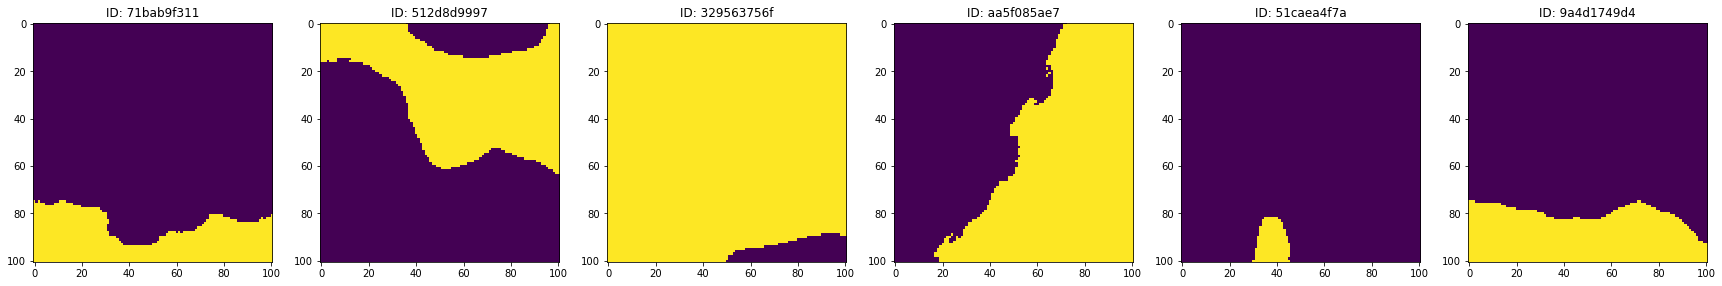

In [5]:
"""
reading and decoding the submission 

"""
df = pd.read_csv('./result/005-submission-crf-once.csv')
i = 0
j = 0
plt.figure(figsize=(30,15))
plt.subplots_adjust(bottom=0.2, top=0.8, hspace=0.2)  #adjust this to change vertical and horiz. spacings..
# Visualizing the predicted outputs
while True:
    if str(df.loc[i,'rle_mask'])!=str(np.nan):        
        decoded_mask = rle_decode(df.loc[i,'rle_mask'])
        plt.subplot(1,6,j+1)
        plt.imshow(decoded_mask)
        plt.title('ID: '+df.loc[i,'id'])
        j = j + 1
        if j>5:
            break
    i = i + 1

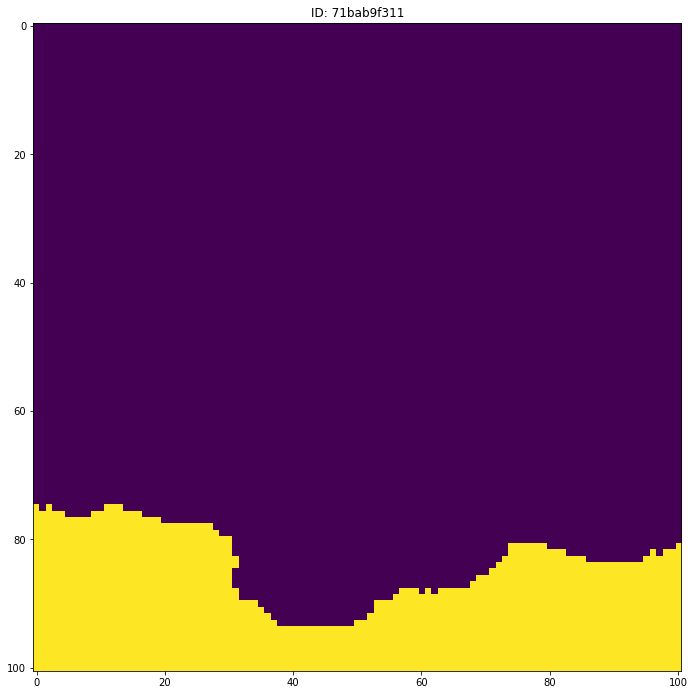

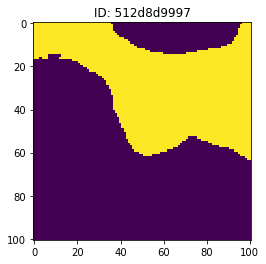

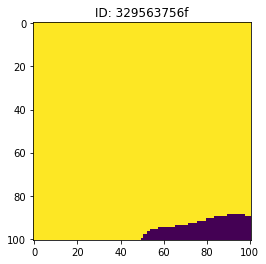

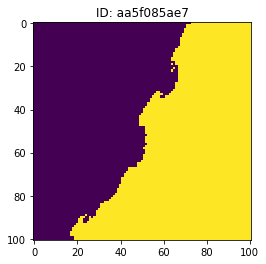

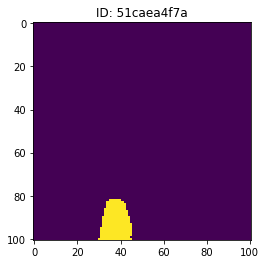

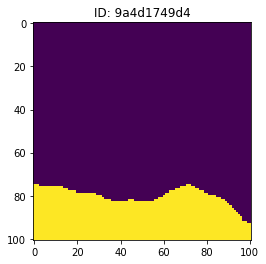

In [7]:
"""
reading and decoding the submission 

"""
df = pd.read_csv('./result/005-submission-crf-once.csv')
i = 0
j = 0
plt.figure(figsize=(30,15))
plt.subplots_adjust(bottom=0.2, top=0.8, hspace=0.2)  #adjust this to change vertical and horiz. spacings..
# Visualizing the predicted outputs
while True:
    if str(df.loc[i,'rle_mask'])!=str(np.nan):        
        decoded_mask = rle_decode(df.loc[i,'rle_mask'])
        # plt.subplot(1,6,j+1)
        plt.imshow(decoded_mask)
        plt.title('ID: '+df.loc[i,'id'])
        plt.show()
        j = j + 1
        if j>5:
            break
    i = i + 1

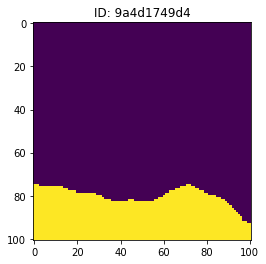

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
7576 3 7647 2 7677 14 7745 7 7778 16 7844 11 7879 20 7942 16 7980 29 8041 20 8081 32 8141 25 8182 33 8240 29 8283 36 8327 3 8339 33 8384 90 8485 91 8586 92 8687 93 8788 94 8889 95 8990 96 9091 97 9192 97 9293 99 9394 808
76 26 177 26 278 26 380 25 481 25 582 25 683 25 784 25 885 25 986 25 1087 25 1188 25 1289 25 1390 25 1492 24 1593 24 1695 23 1796 23 1897 23 1998 23 2100 22 2201 22 2302 22 2403 22 2504 22 2605 22 2706 22 2807 22 2908 22 3010 21 3111 21 3212 21 3314 20 3416 19 3517 19 3618 19 3720 18 3821 18 3922 18 4023 18 4124 18 4225 18 4326 18 4427 18 4527 19 4628 19 4729 19 4831 18 4932 18 5033 18 5134 18 5235 18 5336 18 5437 18 5538 18 5639 18 5739 19 5840 19 5940 20 6041 20 6141 21 6241 22 6342 22 6442 23 6543 23 6644 23 6744 24 6845 24 6945 25 7046 25 7147 25 7247 26 7348 26 7450 25 7551 25 7653 24 7754 24 7856 23 7957 23 8059 22 8160 22 8262 21 8363 21 8464 2

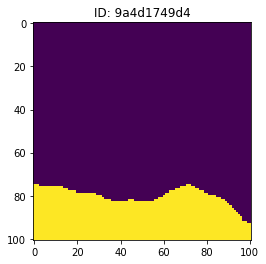

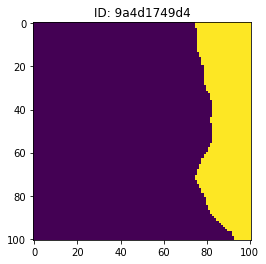

In [13]:
plt.imshow(decoded_mask)
plt.title('ID: '+df.loc[i,'id'])
plt.show()

print(decoded_mask)

print(rle_encode1(decoded_mask))

print(rle_encode2(decoded_mask))

plt.imshow(rle_decode(rle_encode1(decoded_mask)))
plt.title('ID: '+df.loc[i,'id'])
plt.show()


plt.imshow(rle_decode(rle_encode2(decoded_mask)))
plt.title('ID: '+df.loc[i,'id'])
plt.show()